# MACHINE LEARNING WITH TENSORFLOW

This script details using tensorflow for machine learning and a breakdown of the basic to a bit advanced of the machine learning concepts

### How does Tensorflow work?

TensorFlow defines computations as Graphs, and these are made with operations (also know as “ops”). So, when we work with TensorFlow, it is the same as defining a series of operations in a Graph.

To execute these operations as computations, we must launch the Graph into a Session. The session translates and passes the operations represented into the graphs to the device you want to execute them on, be it a GPU or CPU. In fact, TensorFlow's capability to execute the code on different devices such as CPUs and GPUs is a consequence of it's specific structure.

#### Importing Tensorflow

In [1]:
import tensorflow as tf

In [2]:
# Check the version of tensorflow is
tf.__version__

'2.0.0-alpha0'

#### Building a Graph

As we said before, TensorFlow works as a graph computational model. Let's create our first graph which we named as graph1.

In [3]:
graph1 = tf.Graph()

In [5]:
# Lets add two constants to our graph
with graph1.as_default():
    a = tf.constant([2],name = 'constant_a')
    b = tf.constant([3], name = 'constant_b')

In [6]:
# Take a look at the tensor a
a

<tf.Tensor 'constant_a:0' shape=(1,) dtype=int32>

In [7]:
b

<tf.Tensor 'constant_b:0' shape=(1,) dtype=int32>

As you can see, it just show the name, shape and type of the tensor in the graph. We will see it's value when we run it in a TensorFlow session.

In [9]:
# Lets print the value of a
sess = tf.compat.v1.Session(graph= graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


After that, let's make an operation over these tensors. The function tf.add() adds two tensors (you could also use c = a + b).

In [10]:
with graph1.as_default():
    c = tf.add(a, b)
    # you can also use c = a + b

Then TensorFlow needs to initialize a session to run our code. Sessions are, in a way, a context for creating a graph inside TensorFlow. Let's define our session:

In [11]:
sess = tf.compat.v1.Session(graph = graph1)

Let's run the session to get the result from the previous defined 'c' operation:

In [12]:
result = sess.run(c)
print(result)

[5]


In [13]:
# Close the session to release resources:
sess.close()

To avoid having to close sessions every time, we can define them in a with block, so after running the with block the session will close automatically:

In [14]:
with tf.compat.v1.Session(graph= graph1) as sess:
    result = sess.run(c)
    print(result)

[5]


Now we know how to run sessions and add operations to our sessions. Let us understand what a tensor is.

### What is a Tensor

In TensorFlow all data is passed between operations in a computation graph, and these are passed in the form of Tensors, hence the name of TensorFlow.

The word tensor from new latin means "that which stretches". It is a mathematical object that is named "tensor" because an early application of tensors was the study of materials stretching under tension. The contemporary meaning of tensors can be taken as multidimensional arrays.

### Defining Multidimentional Arrays Using Tensorflow

In [15]:
graph2 = tf.Graph()
with graph2.as_default():
    Scalar = tf.constant(2)
    Vector = tf.constant([5,6,2])
    Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
    Tensor = tf.constant([ [[1,2,3], [2,3,4], [3,4,5]], [[4,5,6],[5,6,7],[6,7,8]],[[7,8,9],[8,9,10],[9,10,11]] ])
    
with tf.compat.v1.Session(graph=graph2) as sess:
    result = sess.run(Scalar)
    print ("Scalar (1 entry):\n %s \n" % result)
    result = sess.run(Vector)
    print ("Vector (3 entries) :\n %s \n" % result)
    result = sess.run(Matrix)
    print ("Matrix (3x3 entries):\n %s \n" % result)
    result = sess.run(Tensor)
    print ("Tensor (3x3x3 entries) :\n %s \n" % result)

Scalar (1 entry):
 2 

Vector (3 entries) :
 [5 6 2] 

Matrix (3x3 entries):
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Tensor (3x3x3 entries) :
 [[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]] 



In [16]:
Scalar.shape

TensorShape([])

In [17]:
Tensor.shape

TensorShape([3, 3, 3])

Now that you understand these data structures, I encourage you to play with them using some previous functions to see how they will behave, according to their structure types:

In [18]:
# Addition of two matrices using both tensorflow and normal addition
graph3 = tf.Graph()
with graph3.as_default():
    Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
    Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])
    
    add_1_operation = tf.add(Matrix_one, Matrix_two)
    add_2_operation = Matrix_one + Matrix_two
    
with tf.compat.v1.Session(graph=graph3) as sess:
    result = sess.run(add_1_operation)
    print('Defined using tensorflow function :')
    print(result)
    result = sess.run(add_2_operation)
    print('Defined using normal expressions :')
    print(result)

Defined using tensorflow function :
[[3 4 5]
 [4 5 6]
 [5 6 7]]
Defined using normal expressions :
[[3 4 5]
 [4 5 6]
 [5 6 7]]


In [20]:
# Using the tensorflow multiplication tf.matmul
graph4 = tf.Graph()
with graph4.as_default():
    Matrix_one = tf.constant([[2,3], [3,4]])
    Matrix_two = tf.constant([[2,3], [3,4]])
    
    mul_operation = tf.matmul(Matrix_one, Matrix_two)
    
with tf.compat.v1.Session(graph = graph4) as sess:
    result = sess.run(mul_operation)
    print('Defined using tensorflow function :')
    print(result)

Defined using tensorflow function :
[[13 18]
 [18 25]]


### Why Tensors?

The Tensor structure helps us by giving the freedom to shape the dataset in the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional structure (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particularly helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green. The information contained into an image is the intensity of each channel color into the width and height of the image, just like this:

<img src='https://ibm.box.com/shared/static/xlpv9h5xws248c09k1rlx7cer69y4grh.png'>
<a href="https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131.aspx">Image Source</a>

So the intensity of the red channel at each point with width and height can be represented into a matrix, the same goes for the blue and green channels, so we end up having three matrices, and when these are combined they form a tensor. 

### Variables

Now that we are more familiar with the structure of data, we will take a look at how TensorFlow handles variables. First of all, having tensors, why do we need variables?

TensorFlow variables are used to share and persistent some stats that are manipulated by our program. That is, when you define a variable, TensorFlow adds a tf.Operation to your graph. Then, this operation will store a writable tensor value that persists between tf.Session.run calls. So, you can update the value of a variable through each run, while you cannot update tensor (e.g a tensor created by tf.constant()) through multiple runs in a session.

How to define a variable?
To define variables we use the command tf.Variable(). To be able to use variables in a computation graph it is necessary to initialize them before running the graph in a session. This is done by running tf.global_variables_initializer().

To update the value of a variable, we simply run an assign operation that assigns a value to the variable:

In [29]:
v = tf.Variable(0)

In [23]:
v

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>

Let's first create a simple counter, a variable that increases one unit at a time:

To do this we use the tf.assign(reference_variable, value_to_update) command. tf.assign takes in two arguments, the reference_variable to update, and assign it to the value_to_update it by.

In [30]:
update = tf.compat.v1.assign(v, v+1)

In [26]:
update

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=1>

Variables must be initialized by running an initialization operation after having launched the graph. We first have to add the initialization operation to the graph:

In [31]:
init_op = tf.compat.v1.global_variables_initializer()

We then start a session to run the graph, first initialize the variables, then print the initial value of the state variable, and then run the operation of updating the state variable and printing the result after each update:

In [34]:
graph5 = tf.Graph()
with graph5.as_default():
    v = tf.Variable(0)
    update = tf.compat.v1.assign(v, v+1)
    
    init_op = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session(graph = graph5) as session:
    session.run(init_op)
    print(session.run(v))
    for _ in range(3):
        session.run(update)
        print(session.run(v))

0
1
2
3


### Placeholders

|From the above, we fed the data into the tensorflow graph from within the graph. We may need to feed data into the graph from outside the graph, thus we'll need to use placeholders.

What are placeholders and what do they do?

Placeholders can be seen as "holes" in your model, "holes" which you will pass the data to, you can create them using
tf.placeholder(datatype), where datatype specifies the type of data (integers, floating points, strings, booleans) along with its precision (8, 16, 32, 64) bits.

In [2]:
# Since we keep getting errors with the new tensorflow update, lets simulate the lower version tensorflow.
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [37]:
a = tf.placeholder(tf.float32)

In [38]:
a

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [39]:
b = a + 2

In [40]:
b

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

In [41]:
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:3.5})
    print(result)

5.5


In [42]:
dictionary={a: [ [ [1,2,3],[4,5,6],[7,8,9],[10,11,12] ] , [ [13,14,15],[16,17,18],[19,20,21],[22,23,24] ] ] }

with tf.Session() as sess:
    result = sess.run(b,feed_dict=dictionary)
    print (result)

[[[ 3.  4.  5.]
  [ 6.  7.  8.]
  [ 9. 10. 11.]
  [12. 13. 14.]]

 [[15. 16. 17.]
  [18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]]


Operations
Operations are nodes that represent the mathematical operations over the tensors on a graph. These operations can be any kind of functions, like add and subtract tensor or maybe an activation function.

tf.constant, tf.matmul, tf.add, tf.nn.sigmoid are some of the operations in TensorFlow. These are like functions in python but operate directly over tensors and each one does a specific thing.

In [4]:
graph5 = tf.Graph()
with graph5.as_default():
    a = tf.constant([5])
    b = tf.constant([2])
    c = tf.add(a, b)
    d = tf.subtract(a, b)
    
with tf.Session(graph = graph5) as sess:
    result = sess.run(c)
    print('c =: %s' % result)
    result = sess.run(d)
    print('d =: %s' % result)

c =: [7]
d =: [3]


## Linear Regression with Tensorflow

In [5]:
# Import required packages
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (10, 6)

The equation of a simple linear model is

$$Y = a X + b $$

In [7]:
# Define the independent variable
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

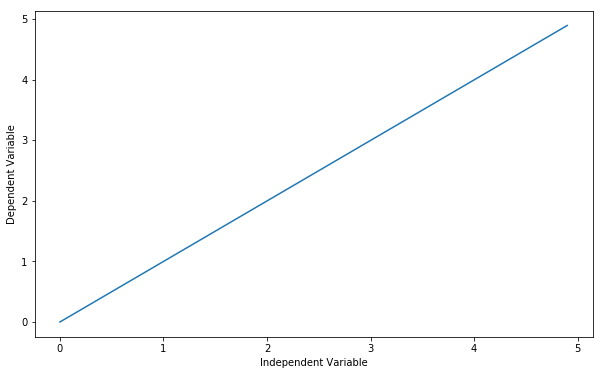

In [8]:
# You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y = a * X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Now we see this for a simple case with random ordered numbers and a single variable.

Let's try to explore a real dataset.

In [9]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-01-21 16:11:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  84.9KB/s    in 0.8s    

2020-01-21 16:11:25 (84.9 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [10]:
!ls

 Assignments#		     Projects#
 Classes#		     Recruitment#
 FuelConsumption.csv	     reinforcement-learning
'Loading Modin.py'	     RL
'ML WITH TENSORFLOW.ipynb'  'Tensorflow Data API.ipynb'
 openmalaria		     ToTry#
 openMalaria-linux	     Untitled.ipynb
 openMalaria-linux.tar.gz    very-deep-convnets-raw-waveforms


In [11]:
df = pd.read_csv('FuelConsumption.csv')

# Take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [12]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [13]:
# Initialize the variables a and b with any random guess, and then we define the linear function:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [14]:
y

<tf.Tensor 'add:0' shape=(1067, 1) dtype=float32>

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [18]:
loss = tf.reduce_mean(tf.square(y - train_y))

Then, we define the optimizer method. The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. Please feel free to make changes to learning parameter and check its effect. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. Please review other material for further information on the optimization. Here we will use a simple gradient descent with a learning rate of 0.05:

In [20]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.05)

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the .minimize() which will minimize the error function of our optimizer, resulting in a better model.

In [21]:
train = optimizer.minimize(loss)

In [22]:
# Now let's initialize the variables before executing a graph
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

Now we are ready to start the optimization and run the graph

In [23]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 77.07106 46.110275
5 1891.7205 58.84462 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5897 56.36652 58.023922
20 1559.0441 55.172844 62.68204
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30512
45 1245.3145 50.33538 81.559074
50 1205.3451 49.55925 84.58775
55 1170.7189 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.734 47.53864 92.472694
70 1092.2203 46.956135 94.74576
75 1072.7163 46.413967 96.86146
80 1055.8193 45.909332 98.83067
85 1041.1812 45.439632 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739


Lets plot the loss values to see how it changes during the training

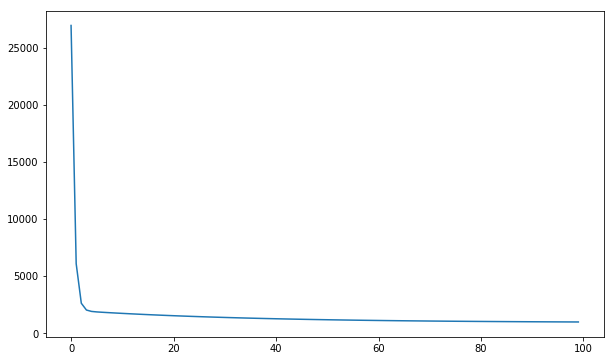

In [27]:
plt.plot(loss_values)

Let's visualize how the coefficient and intercept of line has changed to fit the data

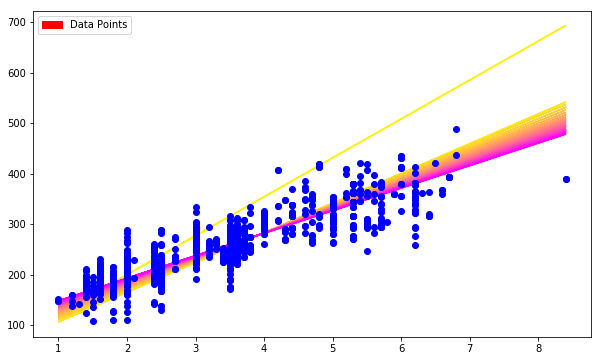

In [30]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data: # Remember we appended our a and b values to this list when minimizing
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0:
        cb = 1.0
    if cg < 0.0:
        cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color = (cr, cg, cb))
    
plt.plot(train_x, train_y, 'bo')

green_line = mpatches.Patch(color = 'red', label = 'Data Points')

plt.legend(handles=[green_line])

plt.show()

## Logistic Regression with Tensorflow

<a id="ref1"></a>
<h2>What is different between Linear and Logistic Regression?</h2>

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is n0t the best tool for predicting the class in which an observed data point belongs. In order to provide estimate for classification, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size="3"><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, <i>y</i>, to some predictors (independent variables <i>x1</i>, <i>x2</i>, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 \times x1 + w2 \times x2 + \cdots
$$
<br>
and finds the values of <i>w0</i>, <i>w1</i>, <i>w2</i>, etc. The term <i>w0</i> is the "intercept" or "constant term" (it's shown as <i>b</i> in the formula below):
<br><br>
$$
Y = W X + b
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <i>y</i>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic <i>regression</i>, it is actually a <b>probabilistic classification</b> model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity $-\infty$) and 1 (as y approaches plus infinity $+\infty$). This now becomes a special kind of non-linear regression.

In this equation, <i>y</i> is the regression result (the sum of the variables weighted by the coefficients), <code>exp</code> is the exponential function and $\theta(y)$ is the <a href="http://en.wikipedia.org/wiki/Logistic_function">logistic function</a>, also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modeling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-y}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid function but then treats the result as a probability:

<img src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


In [31]:
%whos

Variable      Type                        Data/Info
---------------------------------------------------
X             ndarray                     50: 50 elems, type `float64`, 400 bytes
Y             ndarray                     50: 50 elems, type `float64`, 400 bytes
a             float32                     44.595547
a_val         float32                     44.290398
b             float32                     103.95739
b_val         float32                     105.148155
c             Tensor                      Tensor("Add:0", shape=(1,), dtype=int32)
cb            float                       1.0
cg            float                       0.0
cr            float                       1.0
d             Tensor                      Tensor("Sub:0", shape=(1,), dtype=int32)
df            DataFrame                         MODELYEAR   MAKE   <...>n[1067 rows x 13 columns]
f             list                        n=2
f_y           ndarray                     1067x1: 1067 elems, type `float64

In [6]:
# Import modules for use
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
# Load the data and do train test split
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size = 0.33, random_state=42)

Now we define x and y. These placeholders will hold our iris data (both the features and label matrices), and help pass them along to different parts of the algorithm. You can consider placeholders as empty shells into which we insert our data. We also need to give them shapes which correspond to the shape of our data. Later, we will insert data into these placeholders by “feeding” the placeholders the data via a “feed_dict” (Feed Dictionary).

<h3>Why use Placeholders?</h3>

<ol>
    <li>This feature of TensorFlow allows us to create an algorithm which accepts data and knows something about the shape of the data without knowing the amount of data going in.</li>
    <li>When we insert “batches” of data in training, we can easily adjust how many examples we train on in a single step without changing the entire algorithm.</li>
</ol>

In [9]:
tf.compat.v1.disable_eager_execution()

In [10]:
# Numfeatures is the number of features in pur input data
numFeatures = trainX.shape[1]

# NumLabels is the number of classes our data points can be in
numLabels = trainY.shape[1]

# Placeholders
#'None' means tensorflow should not expect a fixed number in that dimension
X = tf.compat.v1.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data
yGold = tf.compat.v1.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes

<h3>Set model weights and bias</h3>

Much like Linear Regression, we need a shared variable weight matrix for Logistic Regression. We initialize both <code>W</code> and <code>b</code> as tensors full of zeros. Since we are going to learn <code>W</code> and <code>b</code>, their initial value does not matter too much. These variables are the objects which define the structure of our regression model, and we can save them after they have been trained so we can reuse them later.

We define two TensorFlow variables as our parameters. These variables will hold the weights and biases of our logistic regression and they will be continually updated during training. 

Notice that <code>W</code> has a shape of [4, 3] because we want to multiply the 4-dimensional input vectors by it to produce 3-dimensional vectors of evidence for the difference classes. <code>b</code> has a shape of [3] so we can add it to the output. Moreover, unlike our placeholders above which are essentially empty shells waiting to be fed data, TensorFlow variables need to be initialized with values, e.g. with zeros.

In [11]:
W = tf.Variable(tf.zeros([4, 3])) # 4 dimensional input for 3 classes
b = tf.Variable(tf.zeros([3])) # 3 dimensional output [0,0,1], [0,1,0], [1,0,0]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
# Randomly sample from a normal distribution with standard deviation .01
weights = tf.Variable(tf.compat.v1.random_normal([numFeatures, numLabels], 
                                                 mean = 0, 
                                                 stddev =0.01, 
                                                 name= 'weights'))
bias = tf.Variable(tf.compat.v1.random_normal([1, numLabels], 
                                              mean = 0, 
                                              stddev = 0.01, 
                                              name = 'bias'))

<h3>Logistic Regression model</h3>

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$$
ŷ =sigmoid(WX+b)
$$

However, for the sake of clarity, we can have it broken into its three main components: 
- a weight times features matrix multiplication operation, 
- a summation of the weighted features and a bias term, 
- and finally the application of a sigmoid function. 

As such, you will find these components defined as three separate operations below.


In [13]:
# Breakdown of the three components for the Logistic Regression Operation
apply_weights_op = tf.matmul(X, weights, name='apply_weights')
add_bias_op = tf.add(apply_weights_op, bias, name='add_bias')
activation_op = tf.nn.sigmoid(add_bias_op, name='activation')

In [23]:
apply_weights_op, add_bias_op, activation_op

(<tf.Tensor 'apply_weights:0' shape=(None, 3) dtype=float32>,
 <tf.Tensor 'add_bias:0' shape=(None, 3) dtype=float32>,
 <tf.Tensor 'activation:0' shape=(None, 3) dtype=float32>)

As we have seen before, the function we are going to use is the <i>logistic function</i> $(\frac{1}{1+e^{-Wx}})$, which is fed the input data after applying weights and bias. In TensorFlow, this function is implemented as the <code>nn.sigmoid</code> function. Effectively, this fits the weighted input with bias into a 0-100 percent curve, which is the probability function we want.

<a id="ref3"></a>
<h2>Training</h2>

The learning algorithm is how we search for the best weight vector (${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error/cost measure.

<b>What tell us our model is bad?</b>  
The Cost or Loss of the model, so what we want is to minimize that. 

<b>What is the cost function in our model?</b>  
The cost function we are going to utilize is the Squared Mean Error loss function.

<b>How to minimize the cost function?</b>   
We can't use <b>least-squares linear regression</b> here, so we will use <a href="http://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a> instead. Specifically, we will use batch gradient descent which calculates the gradient from all data points in the data set.

<h3>Cost function</h3>
Before defining our cost function, we need to define how long we are going to train and how should we define the learning rate.

In [14]:
# Number of epochs in training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.compat.v1.train.exponential_decay(learning_rate = 0.0008, 
                                                    global_step = 1, 
                                                    decay_steps = trainX.shape[0], 
                                                    decay_rate = 0.95, 
                                                    staircase=True)

In [15]:
# Defining our cost function - Squared Mean Error
cost_op = tf.nn.l2_loss(activation_op-yGold, name = 'squared_error_cost')

# Defining our Gradient Descent
training_op = tf.compat.v1.train.GradientDescentOptimizer(learningRate).minimize(cost_op)

Now we move on to actually running our operations. We will start with the operations involved in the prediction phase (i.e. the logistic regression itself).

First, we need to initialize our weights and biases with zeros or random values via the inbuilt Initialization Op, <b>tf.initialize_all_variables()</b>. This Initialization Op will become a node in our computational graph, and when we put the graph into a session, then the Op will run and create the variables.

In [16]:
# Create a tensorflow session
sess = tf.compat.v1.Session()

# initialize our weights and bias variables
init_op = tf.compat.v1.global_variables_initializer()

# initialize all tensorflow variables
sess.run(init_op)

Lets create some additoinal operations to keep track of our model's efficiency over time. We can do it thus:

In [17]:
tf.argmax(yGold, 1)

<tf.Tensor 'ArgMax:0' shape=(None,) dtype=int64>

In [22]:
# argmax(activation_op, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_pred_op = tf.equal(tf.argmax(activation_op,1), tf.argmax(yGold, 1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_op = tf.reduce_mean(tf.cast(correct_pred_op, 'float32'))

# Summary operation for regression output
activation_summary_op = tf.summary.histogram("output", activation_op)

# Summary operation for accuracy
accuracy_summary_op = tf.summary.scalar("accuracy", accuracy_op)

# Summary op for cost
cost_summary_op = tf.summary.scalar("cost", cost_op)

# Summary op to check how variables W and b are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session = sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries 
merged = tf.compat.v1.summary.merge([activation_summary_op, accuracy_summary_op, cost_summary_op, weightSummary, biasSummary])

# Summary writer
writer = tf.compat.v1.summary.FileWriter("summary_logs", sess.graph)

TypeError: Tensors in list passed to 'inputs' of 'MergeSummary' Op have types [bool, bool, bool, bool, bool] that do not match expected type string.

Now we can define and run the actual training loop

In [26]:
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print('change in cost %g; convergence.'%diff)
        break
    else:
        # Run training step
        step = sess.run(training_op, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch valus
            epoch_values.append(i)
            # generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_op, cost_op], feed_dict={X: trainX, yGold: trainY})
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Reassign values for variables
            diff = abs(newCost - cost)
            cost = newCost
            
            # Generate print statements
            print('step %d, training accuracy %g, cost %g, change in cost %g'%(i, train_accuracy, newCost, diff))
            
# How well do we perform on held-out test data?
print("final accuracy on test set: %s"%str(sess.run(accuracy_op, feed_dict={X:testX, yGold: testY})))

step 0, training accuracy 0.949495, cost 12.9386, change in cost 12.9386
step 10, training accuracy 0.949495, cost 12.9273, change in cost 0.0112953
step 20, training accuracy 0.949495, cost 12.9161, change in cost 0.0112076
step 30, training accuracy 0.949495, cost 12.905, change in cost 0.0111198
step 40, training accuracy 0.949495, cost 12.8939, change in cost 0.0110388
step 50, training accuracy 0.949495, cost 12.883, change in cost 0.010952
step 60, training accuracy 0.949495, cost 12.8721, change in cost 0.0108681
step 70, training accuracy 0.949495, cost 12.8613, change in cost 0.010788
step 80, training accuracy 0.949495, cost 12.8506, change in cost 0.0107069
step 90, training accuracy 0.949495, cost 12.84, change in cost 0.0106258
step 100, training accuracy 0.949495, cost 12.8294, change in cost 0.0105486
step 110, training accuracy 0.949495, cost 12.819, change in cost 0.0104685
step 120, training accuracy 0.949495, cost 12.8086, change in cost 0.0103903
step 130, training 

Let's plot the cost to see how it behaves

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


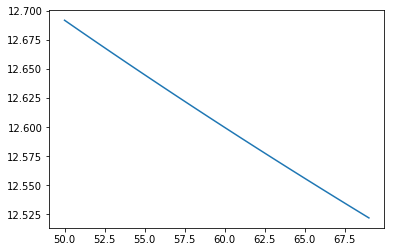

In [27]:
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

Assuming no parameters were changed, you should reach a peak accuracy of 90% at the end of training, which is commendable. Try changing the parameters such as the length of training, and maybe some operations to see how the model behaves. Does it take much longer? How is the performance?

Now lets take a look at activation functions

<h1 align="center"> Activation Functions </h1><br>
Activation functions are a cornerstone of Machine Learning. In general, Activation Functions define how a processing unit will treat its input -- usually passing this input through it and generating an output through its result. To
begin the process of having a more intuitive understanding, let's go through some of the most commonly used functions.

In [28]:
# importing dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

The next cell implements a basic function that plots a surface for an arbitrary activation function. The plot is done for all possible values of weight and bias between -0.5 and 0.5 with a step of 0.05. The input, the weight, and the bias are one-dimensional. Additionally, the input can be passed as an argument.

In [29]:
def plot_act(i=1.0, actfunc=lambda x: x):
    ws = np.arange(-0.5, 0.5, 0.05)
    bs = np.arange(-0.5, 0.5, 0.05)
    
    X, Y = np.meshgrid(ws, bs)
    
    os = np.array([actfunc(tf.constant(w*i + b)).eval(session= sess) for w, b in zip(np.ravel(X), np.ravel(Y))])
    
    Z = os.reshape(X.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride = 1)    

#### Basic Structure

In this example we illustrate how, in Tensorflow, to compute the weighted sum that goes into the neuron and direct it to the activation function. For further details, read the code comments below.

In [32]:
#start a session
sess = tf.compat.v1.Session();
#create a simple input of 3 real values
i = tf.constant([1.0, 2.0, 3.0], shape=[1, 3])
#create a matrix of weights
w = tf.compat.v1.random_normal(shape=[3, 3])
#create a vector of biases
b = tf.compat.v1.random_normal(shape=[1, 3])
#dummy activation function
def func(x): return x
#tf.matmul will multiply the input(i) tensor and the weight(w) tensor then sum the result with the bias(b) tensor.
act = func(tf.matmul(i, w) + b)
#Evaluate the tensor to a numpy array
act.eval(session=sess)

array([[-0.8472042,  3.8733442, -3.3953547]], dtype=float32)

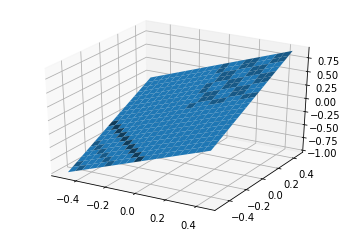

In [33]:
plot_act(1.0, func)